# Convolution 연산에서 stride가 맞아 떨어지지 않는 경우

In [153]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

## stride = 1일 때

In [154]:
class CNN1(torch.nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv(x)

이 때 output으로 나오는 feature map의 size는 {(30-3)/1} + 1 = 28로 원래 size로 나오게 된다.  
(zero padding을 1줄 붙이고, stride를 1로 준 결과)

In [155]:
torch.manual_seed(777)

mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=1, drop_last=True, shuffle=True)

model1 = CNN1()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [156]:
for X,Y in loader:
    prediction = model1(X)
    print('Target value :', Y, '\n')
    print('Feature value :')
    feature_map = prediction.detach().numpy()
    print(feature_map, '\n')
    print(prediction.shape)
    break


Target value : tensor([7]) 

Feature value :
[[[[-0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024]
   [-0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024]
   [-0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15771024 -0.15

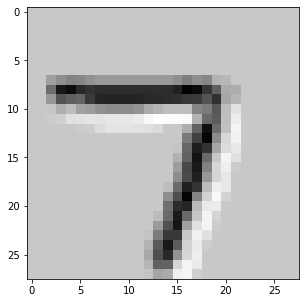

In [157]:
plt.figure(figsize=(5,5))
image = np.reshape(feature_map,[28,28])
plt.imshow(image, cmap='Greys')
plt.show()

## stride = 2일 때

In [158]:
class CNN2(torch.nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        return self.conv(x)

이 때 output으로 나오는 feature map의 size는 {(30 - 3)/2} + 1 = 14.5가 예상 결과이다.  
(zero padding을 1 사용하고, stride를 2로 주었을 때의 결과)

In [159]:
model2 = CNN2()

for X,Y in loader:
    prediction = model2(X)
    print('Target value :', Y, '\n')
    print('Feature value :')
    feature_map = prediction.detach().numpy()
    print(feature_map, '\n')
    print(prediction.shape)
    break

Target value : tensor([0]) 

Feature value :
[[[[-0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639]
   [-0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639]
   [-0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.18565942 -0.12089402  0.17346625 -0.13499257 -0.17804639 -0.17804639 -0.17804639]
   [-0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.18513438 -0.04863395  0.85405284  0.63734597  0.02416951 -0.17804639 -0.17804639 -0.17804639]
   [-0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.18618445 -0.18979366  0.78403145  0.610407    0.71328026  0.06007987 -0.17804639 -0.17804639 -0.17804639]
   [-0.17804639 -0.17804639 -0.17804639 -0.17804639 -0.18382178 -0.096742    0.8434661   0

예상과는 다르게 그냥 14 x 14의 tensor가 나온 것을 확인했다

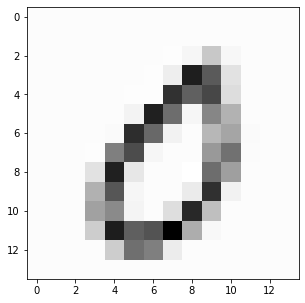

In [160]:
plt.figure(figsize=(5,5))
image = np.reshape(feature_map,[14,14])
plt.imshow(image, cmap='Greys')
plt.show()

## 어떤 연산이 이루어지고 있는지 직접 해보기

In [161]:
input = torch.ones(1,1,5,5)
print('Input', '\n', input, '\n')

filter = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=2)
print('Initial parameter :', '\n', filter.weight, '\n')

weight = torch.ones(1,1,2,2)
weight[:,:,0,:] = 0
filter.weight = torch.nn.Parameter(weight)

print('Changed parameters :','\n', filter.weight, '\n')
print('filter bias :', filter.bias, '\n')
output = filter(input)
print('Output :', '\n', output)

Input 
 tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]]) 

Initial parameter : 
 Parameter containing:
tensor([[[[-0.3477, -0.1846],
          [-0.1229,  0.1166]]]], requires_grad=True) 

Changed parameters : 
 Parameter containing:
tensor([[[[0., 0.],
          [1., 1.]]]], requires_grad=True) 

filter bias : Parameter containing:
tensor([0.0355], requires_grad=True) 

Output : 
 tensor([[[[2.0355, 2.0355],
          [2.0355, 2.0355]]]], grad_fn=<ThnnConv2DBackward>)


즉, stride가 원래 이미지에 맞는 것을 고려하지 않아도 torch에서는 자연스럽게 이에 대한 연산을 진행함.  
이 때, 연산은 평소처럼 진행하다가 stride가 맞지 않는 부분에 도달하면 이에 대한 연산을 아예 제외하는 방식으로 하는 것 같다는 결론.